# Homomorphic Encryption

LightPHE is a lightweight partially homomorphic encryption library for python. It wraps many partially homomorphic algorithms such as RSA, ElGamal, Exponential ElGamal, Elliptic Curve ElGamal, Paillier, Damgard-Jurik, Okamoto–Uchiyama, Benaloh, Naccache–Stern, Goldwasser–Micali. With LightPHE, you can build homomorphic crypto systems with a couple of lines of code, encrypt & decrypt your data and perform homomorphic operations such as homomorphic addition, homomorphic multiplication, homomorphic xor, regenerate cipher texts, multiplying your cipher text with a known plain constant according to the built algorithm.

In [ ]:
# install relevant packages
from lightphe import LightPHE
import time
import matplotlib.pyplot as plt
import numpy as np
import json
import random

## Testing different propperties of algorithms

In [1]:
# supported algorithms
algorithms = [
  'RSA',
  'ElGamal',
  'Exponential-ElGamal',
  'Paillier',
  'Damgard-Jurik',
  'Okamoto-Uchiyama',
  'Benaloh',
  'Naccache-Stern',
  'Goldwasser-Micali',
  'EllipticCurve-ElGamal'
]
 
# build a Paillier cryptosystem which is homomorphic
# with respect to the addition
cs = LightPHE(algorithm_name = algorithms[3])
 
# define plaintexts
m1 = 17
m2 = 23
 
# calculate ciphertexts
c1 = cs.encrypt(m1)
c2 = cs.encrypt(m2)
 
# performing homomorphic addition on ciphertexts
assert cs.decrypt(c1 + c2) == m1 + m2
 
# scalar multiplication (increase its value 5%)
k = 5
assert cs.decrypt(k * c1) == k * m1


## Experimenting with vectors and Paillier

Additively homomorphic encryption enables computations on encrypted data without decrypting it, preserving data privacy. In this tutorial, we'll leverage the Paillier cryptosystem to demonstrate essential operations such as encryption, addition, scalar multiplication, and decryption, all while validating the results.

This step-by-step guide includes:

- Setting up the cryptosystem
- Defining plain tensors
- Encrypting tensors
- Performing homomorphic operations
- Decrypting and validating results

Let’s get started by initializing the Paillier cryptosystem and exploring its capabilities.


In [2]:
# build an additively homomorphic cryptosystem
cs = LightPHE(algorithm_name="Paillier")

# define plain tensors
t1 = [1.005, 2.05, 3.5, 4]
t2 = [5, 6.2, 7.002, 8.02]

# encrypt tensors
c1 = cs.encrypt(t1)
c2 = cs.encrypt(t2)

# perform homomorphic addition
c3 = c1 + c2

# perform homomorphic scalar multiplication
k = 5
c5 = k * c1

# decrypt the addition tensor
t3 = cs.decrypt(c3)

# decrypt the scalar multiplied tensor
t5 = cs.decrypt(c5)

# data validations
threshold = 0.5
for i in range(0, len(t1)):
   assert abs((t1[i] + t2[i]) - t3[i]) < threshold
   assert abs((t1[i] * k) - t5[i]) < threshold

## Calculate the square eucledian distance using Paillier

First of all, let's generate a random vector with length 256 using numpy.



In [3]:
print(np.random.randint(1, 10, 256)) # generate a random vector with length 256

[7 3 2 5 2 5 2 9 1 5 2 1 3 1 6 9 7 5 1 2 3 6 5 8 4 2 8 3 3 1 1 8 9 3 8 5 1
 5 3 7 6 7 9 7 6 3 6 8 8 8 8 3 9 2 7 5 3 9 2 5 1 5 6 2 9 3 8 9 3 6 5 3 9 9
 3 7 7 4 1 4 5 4 8 6 8 9 4 2 7 6 7 3 3 4 3 1 4 9 7 9 3 8 2 3 3 7 6 6 5 7 6
 3 5 4 4 5 1 6 8 7 9 9 1 1 1 8 7 5 5 2 1 3 5 7 6 7 1 1 9 9 4 4 1 8 7 4 2 1
 2 2 6 8 7 3 3 1 4 3 9 1 5 9 8 5 6 6 7 3 1 7 3 8 7 3 8 4 1 8 6 1 7 7 1 3 1
 1 7 9 6 1 1 2 9 8 8 5 1 1 4 5 8 9 1 7 4 5 4 9 9 4 3 2 4 9 8 9 9 7 1 1 4 4
 8 9 3 3 8 7 4 3 1 3 8 7 6 4 7 7 1 6 3 4 8 8 6 5 7 3 8 3 4 4 1 8 6 2]


The squared Euclidean distance between two vectors X and Y is the sum of the squared differences between the corresponding elements of the two vectors. In this tutorial, we'll leverage the Paillier cryptosystem to calculate the squared Euclidean distance between two vectors using homomorphic encryption.

In [4]:
cs = LightPHE(algorithm_name='Paillier')

# Client-side:
X = np.random.randint(1, 10, 256)  # Client's feature vector
enc_X = [cs.encrypt(int(x)) for x in X]  # Client encrypts each element of X

# Client computes Enc(S1 = sum(x_i^2)) and sends it to the server
S1 = np.sum(X ** 2).item()  # Sum of squares of X
enc_S1 = cs.encrypt(S1)

# Server-side: Define the vector Y (held unencrypted by the server)
Y = np.random.randint(1, 10, 256)  # Server's feature vector

# Step 1: Server computes S2 = sum(y_i^2)
S2 = np.sum(Y ** 2).item()  # Sum of squares of Y (unencrypted, direct calculation -> server has access)
enc_S2 = cs.encrypt(S2)

# Step 2: Server computes the cross term Enc(S3) using homomorphic properties
enc_S3 = cs.encrypt(0)  # Initialize as 0 in encrypted form
for i in range(len(X)):
    cross_term = -2 * Y[i]  # Calculate -2 * y_i
    enc_S3 += enc_X[i] * int(cross_term)  # Convert cross_term to Python int

# Step 3: Combine Enc(S1), Enc(S3), and S2 to get Enc(D(X, Y)^2)
enc_D_squared = enc_S1 + enc_S3 + enc_S2

# For verification purposes, decrypt the result (in practice, this would remain encrypted on server side)
D_squared = cs.decrypt(enc_D_squared)
print("Encrypted squared distance (decrypted for verification):", D_squared)


Encrypted squared distance (decrypted for verification): 3523


## Script to verify Result
Verify the result by calculating the squared Euclidean distance between the vectors X and Y using NumPy and comparing it with the homomorphically computed result.

In [5]:
# Calculate squared Euclidean distance
squared_distance = np.sum((X - Y) ** 2)

print("Squared Euclidean Distance:", squared_distance)


Squared Euclidean Distance: 3523


## Implementing time measure for different vector lengths (using Paillier)

Let's measure the computation time for calculating the squared Euclidean distance using homomorphic encryption across different vector lengths. We will test vector lengths ranging from 2 to 2048 and plot the results to observe the performance of the Paillier algorithm.

Vector length: 2, Time taken: 0.112470 seconds, Squared Distance: 41
Vector length: 4, Time taken: 0.148860 seconds, Squared Distance: 76
Vector length: 8, Time taken: 0.233655 seconds, Squared Distance: 82
Vector length: 16, Time taken: 0.379483 seconds, Squared Distance: 146
Vector length: 32, Time taken: 0.689416 seconds, Squared Distance: 435
Vector length: 64, Time taken: 1.262221 seconds, Squared Distance: 907
Vector length: 128, Time taken: 2.443458 seconds, Squared Distance: 1523
Vector length: 256, Time taken: 4.755040 seconds, Squared Distance: 3587
Vector length: 512, Time taken: 9.455842 seconds, Squared Distance: 6658
Vector length: 1024, Time taken: 19.121914 seconds, Squared Distance: 13245
Vector length: 2048, Time taken: 38.064516 seconds, Squared Distance: 27114


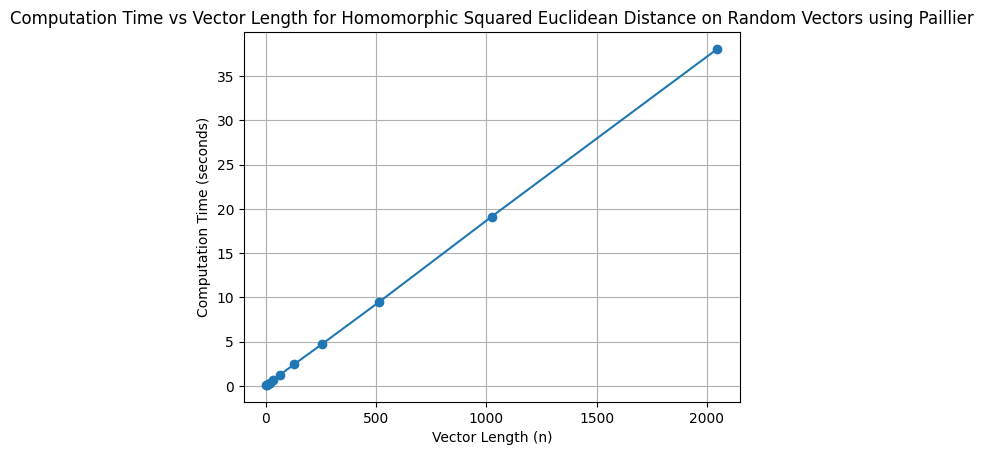

In [6]:
# Initialize LightPHE with Paillier encryption
cs = LightPHE(algorithm_name='Paillier')

# Define the vector lengths to test
vector_lengths = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
times = []

# Function to calculate squared Euclidean distance using homomorphic encryption
def homomorphic_squared_euclidean_distance(cs, X, Y):
    # Client-side: Encrypt the vector X
    enc_X = [cs.encrypt(int(x)) for x in X]

    # Client computes Enc(S1 = sum(x_i^2)) and sends it to the server
    S1 = np.sum(X ** 2).item()
    enc_S1 = cs.encrypt(S1)

    # Server computes S2 = sum(y_i^2)
    S2 = np.sum(Y ** 2).item()
    enc_S2 = cs.encrypt(S2)

    # Server computes the cross term Enc(S3)
    enc_S3 = cs.encrypt(0)  # Initialize as 0 in encrypted form
    for i in range(len(X)):
        cross_term = -2 * Y[i]
        enc_S3 += enc_X[i] * int(cross_term)  # Homomorphic multiplication with encrypted x_i

    # Combine Enc(S1), Enc(S3), and Enc(S2) to get Enc(D(X, Y)^2)
    enc_D_squared = enc_S1 + enc_S3 + enc_S2
    return enc_D_squared

# Measure time for each vector length
for n in vector_lengths:
    # Generate random vectors X and Y of length n
    X = np.random.randint(1, 10, n)
    Y = np.random.randint(1, 10, n)

    # Start timing
    start_time = time.time()
    
    # Compute homomorphic squared Euclidean distance
    enc_D_squared = homomorphic_squared_euclidean_distance(cs, X, Y)
    
    # Decrypt the result to verify (only for testing; in real use, keep encrypted)
    D_squared = cs.decrypt(enc_D_squared)
    
    # End timing
    end_time = time.time()
    
    # Calculate elapsed time and store it
    elapsed_time = end_time - start_time
    times.append(elapsed_time)

    print(f"Vector length: {n}, Time taken: {elapsed_time:.6f} seconds, Squared Distance: {D_squared}")

# Plotting the results
plt.plot(vector_lengths, times, marker='o')
plt.xlabel("Vector Length (n)")
plt.ylabel("Computation Time (seconds)")
plt.title("Computation Time vs Vector Length for Homomorphic Squared Euclidean Distance on Random Vectors using Paillier")
plt.grid(True)
plt.show()


## Comparison of different algorithms and length

We will now compare the computation time for calculating the squared Euclidean distance using homomorphic encryption across various algorithms and vector lengths. The algorithms we will test include Exponential-ElGamal, Paillier, Damgard-Jurik, Okamoto-Uchiyama, Benaloh, Naccache-Stern, and EllipticCurve-ElGamal. We will measure the computation time for vector lengths ranging from 2 to 2048 and plot the results to compare the performance of different algorithms. 

Testing algorithm: Exponential-ElGamal
Algorithm: Exponential-ElGamal, Vector length: 2, Time taken: 0.012266 seconds
Algorithm: Exponential-ElGamal, Vector length: 4, Time taken: 0.015291 seconds
Algorithm: Exponential-ElGamal, Vector length: 8, Time taken: 0.024798 seconds
Algorithm: Exponential-ElGamal, Vector length: 16, Time taken: 0.042126 seconds
Algorithm: Exponential-ElGamal, Vector length: 32, Time taken: 0.076138 seconds
Algorithm: Exponential-ElGamal, Vector length: 64, Time taken: 0.150820 seconds
Algorithm: Exponential-ElGamal, Vector length: 128, Time taken: 0.303014 seconds
Algorithm: Exponential-ElGamal, Vector length: 256, Time taken: 0.591693 seconds
Algorithm: Exponential-ElGamal, Vector length: 512, Time taken: 1.195119 seconds
Algorithm: Exponential-ElGamal, Vector length: 1024, Time taken: 2.399659 seconds
Algorithm: Exponential-ElGamal, Vector length: 2048, Time taken: 5.149383 seconds
Testing algorithm: Paillier
Algorithm: Paillier, Vector length: 2, Time taken

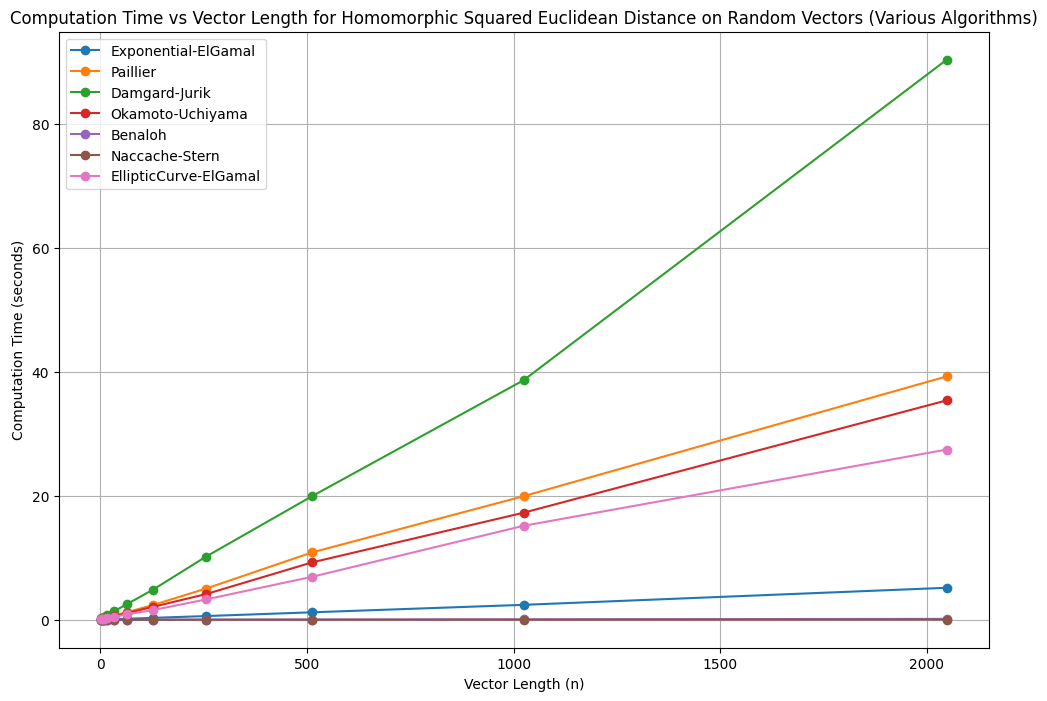

In [7]:
# Define the vector lengths to test
vector_lengths = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

# Define the algorithms to test
algorithms = [
    'Exponential-ElGamal',
    'Paillier',
    'Damgard-Jurik',
    'Okamoto-Uchiyama',
    'Benaloh',
    'Naccache-Stern',
    'EllipticCurve-ElGamal'
]

# Dictionary to hold times for each algorithm and vector length
results = {alg: [] for alg in algorithms}

# Function to calculate squared Euclidean distance using homomorphic encryption
def homomorphic_squared_euclidean_distance(cs, X, Y):
    # Client-side: Encrypt the vector X
    enc_X = [cs.encrypt(int(x)) for x in X]

    # Client computes Enc(S1 = sum(x_i^2)) and sends it to the server
    S1 = np.sum(X ** 2).item()
    enc_S1 = cs.encrypt(S1)

    # Server computes S2 = sum(y_i^2)
    S2 = np.sum(Y ** 2).item()
    enc_S2 = cs.encrypt(S2)

    # Server computes the cross term Enc(S3)
    enc_S3 = cs.encrypt(0)  # Initialize as 0 in encrypted form
    for i in range(len(X)):
        cross_term = -2 * Y[i]
        enc_S3 += enc_X[i] * int(cross_term)  # Homomorphic multiplication with encrypted x_i

    # Combine Enc(S1), Enc(S3), and Enc(S2) to get Enc(D(X, Y)^2)
    enc_D_squared = enc_S1 + enc_S3 + enc_S2
    return enc_D_squared

# Run the test for each algorithm and vector length
for alg in algorithms:
    # Initialize the encryption scheme for the algorithm
    cs = LightPHE(algorithm_name=alg)
    print(f"Testing algorithm: {alg}")

    for n in vector_lengths:
        # Generate random vectors X and Y of length n
        X = np.random.randint(1, 10, n)
        Y = np.random.randint(1, 10, n)

        # Start timing
        start_time = time.time()
        
        # Compute homomorphic squared Euclidean distance
        enc_D_squared = homomorphic_squared_euclidean_distance(cs, X, Y)
        
        # Decrypt the result to verify (only for testing; in real use, keep encrypted)
        D_squared = cs.decrypt(enc_D_squared)
        
        # End timing
        end_time = time.time()
        
        # Calculate elapsed time and store it
        elapsed_time = end_time - start_time
        results[alg].append(elapsed_time)

        print(f"Algorithm: {alg}, Vector length: {n}, Time taken: {elapsed_time:.6f} seconds")

# Plotting the results
plt.figure(figsize=(12, 8))

# For each algorithm, plot the times across vector lengths
for alg in algorithms:
    plt.plot(vector_lengths, results[alg], marker='o', label=alg)

plt.xlabel("Vector Length (n)")
plt.ylabel("Computation Time (seconds)")
plt.title("Computation Time vs Vector Length for Homomorphic Squared Euclidean Distance on Random Vectors (Various Algorithms)")
plt.legend()
plt.grid(True)
plt.show()


## Squared Eucledian Distance for different algorithms using real biometric sample vectors
Test for the ElliepticCurve-ElGamal algorithm

In [14]:
# Load the data from "new_emb.txt"
with open('emb.txt', 'r') as f:
    data = f.read()
ALL_DICT_DATA = json.loads(data)

labels = list(ALL_DICT_DATA.keys())

# Define the vector lengths to test (truncating vectors to these lengths)
vector_lengths = [32, 64, 128, 192]  # Adjust according to your vector's actual length

# Define the algorithms to test
algorithms = [
    'EllipticCurve-ElGamal'
]

# Dictionary to hold average times for each algorithm and vector length
results = {alg: [] for alg in algorithms}

# Function to process the vector (e.g., convert to integer representation)
def process_vector(vec):
    # Multiply each element by CONVERSION_FACTOR (256) and convert to int
    CONVERSION_FACTOR = 1 << 8  # 256
    return [int(v * CONVERSION_FACTOR) for v in vec]

# Function to calculate squared Euclidean distance using homomorphic encryption
def homomorphic_squared_euclidean_distance(cs, X, Y):
    # Client-side: Encrypt the vector X
    enc_X = [cs.encrypt(int(x)) for x in X]

    # Client computes Enc(S1 = sum(x_i^2)) and sends it to the server
    S1 = np.sum(np.array(X) ** 2).item()
    enc_S1 = cs.encrypt(S1)

    # Server computes S2 = sum(y_i^2)
    S2 = np.sum(np.array(Y) ** 2).item()
    enc_S2 = cs.encrypt(S2)

    # Server computes the cross term Enc(S3)
    enc_S3 = cs.encrypt(0)  # Initialize as 0 in encrypted form
    for i in range(len(X)):
        cross_term = -2 * Y[i]
        enc_S3 += enc_X[i] * int(cross_term)  # Homomorphic multiplication with encrypted x_i

    # Combine Enc(S1), Enc(S3), and Enc(S2) to get Enc(D(X, Y)^2)
    enc_D_squared = enc_S1 + enc_S3 + enc_S2
    return enc_D_squared

# Number of pairs to test per algorithm per vector length
num_pairs = 5  # Adjusted to 30 for statistical relevance

# Run the test for each algorithm and vector length
for alg in algorithms:
    # Initialize the encryption scheme for the algorithm
    cs = LightPHE(algorithm_name=alg)
    print(f"Testing algorithm: {alg}")

    for n in vector_lengths:
        times = []

        for _ in range(num_pairs):
            # Randomly select two different labels
            label_X, label_Y = random.sample(labels, 2)

            # Get the vectors and truncate to length n
            X_raw = ALL_DICT_DATA[label_X][:n]
            Y_raw = ALL_DICT_DATA[label_Y][:n]

            # Process the vectors to convert to integer representation
            X = process_vector(X_raw)
            Y = process_vector(Y_raw)

            # Start timing
            start_time = time.time()
            
            # Compute homomorphic squared Euclidean distance
            enc_D_squared = homomorphic_squared_euclidean_distance(cs, X, Y)
            
            # Decrypt the result to verify (only for testing; in real use, keep encrypted)
            D_squared = cs.decrypt(enc_D_squared)
            
            # End timing
            end_time = time.time()
            
            # Calculate elapsed time and store it
            elapsed_time = end_time - start_time
            times.append(elapsed_time)

        # Compute average time for this vector length
        avg_time = sum(times) / num_pairs
        results[alg].append(avg_time)
        print(f"Algorithm: {alg}, Vector length: {n}, Average Time: {avg_time:.6f} seconds")

# Plotting the results
plt.figure(figsize=(12, 8))

# For each algorithm, plot the average times across vector lengths
for alg in algorithms:
    plt.plot(vector_lengths, results[alg], marker='o', label=alg)

plt.xlabel("Vector Length (n)")
plt.ylabel("Average Computation Time (seconds)")
plt.title("Average Computation Time vs Vector Length for Homomorphic Squared Euclidean Distance on Biometric Vectors (Various Algorithms)")
plt.legend()
plt.grid(True)
plt.show()


Testing algorithm: EllipticCurve-ElGamal


KeyboardInterrupt: 

Experimenting with different algorithms except for EllipticCurve-ElGamal as it is not efficient for large vectors in our case.

Testing algorithm: Exponential-ElGamal
Algorithm: Exponential-ElGamal, Vector length: 32, Average Time: 19.358335 seconds
Algorithm: Exponential-ElGamal, Vector length: 64, Average Time: 29.662635 seconds
Algorithm: Exponential-ElGamal, Vector length: 128, Average Time: 70.539881 seconds
Algorithm: Exponential-ElGamal, Vector length: 192, Average Time: 112.552977 seconds
Testing algorithm: Paillier
Algorithm: Paillier, Vector length: 32, Average Time: 0.747241 seconds
Algorithm: Paillier, Vector length: 64, Average Time: 1.422447 seconds
Algorithm: Paillier, Vector length: 128, Average Time: 2.784502 seconds
Algorithm: Paillier, Vector length: 192, Average Time: 4.165446 seconds
Testing algorithm: Damgard-Jurik
Algorithm: Damgard-Jurik, Vector length: 32, Average Time: 1.806130 seconds
Algorithm: Damgard-Jurik, Vector length: 64, Average Time: 3.329543 seconds
Algorithm: Damgard-Jurik, Vector length: 128, Average Time: 6.577717 seconds
Algorithm: Damgard-Jurik, Vector length: 192, Aver

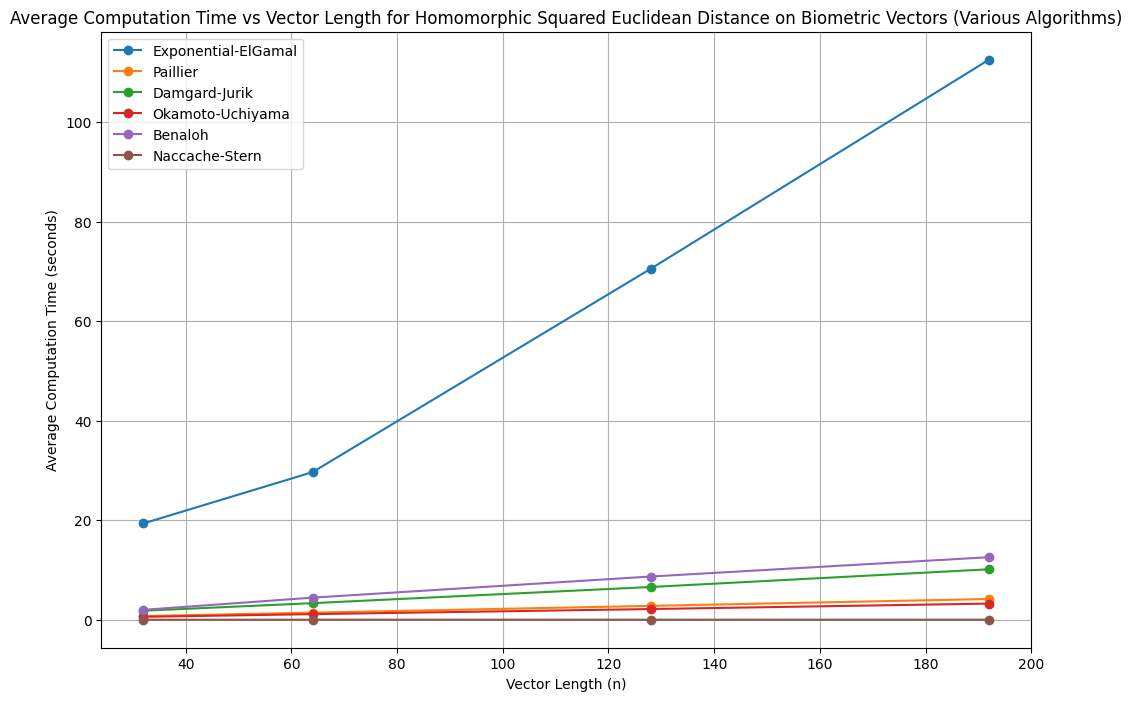

In [11]:
# Load the data from "new_emb.txt"
with open('emb.txt', 'r') as f:
    data = f.read()
ALL_DICT_DATA = json.loads(data)

labels = list(ALL_DICT_DATA.keys())

# Define the vector lengths to test (truncating vectors to these lengths)
vector_lengths = [32, 64, 128, 192]  # Adjust according to your vector's actual length

# Define the algorithms to test
algorithms = [
    'Exponential-ElGamal',
    'Paillier',
    'Damgard-Jurik',
    'Okamoto-Uchiyama',
    'Benaloh',
    'Naccache-Stern'
]

# Dictionary to hold average times for each algorithm and vector length
results = {alg: [] for alg in algorithms}

# Function to process the vector (e.g., convert to integer representation)
def process_vector(vec):
    # Multiply each element by CONVERSION_FACTOR (256) and convert to int
    CONVERSION_FACTOR = 1 << 8  # 256
    return [int(v * CONVERSION_FACTOR) for v in vec]

# Function to calculate squared Euclidean distance using homomorphic encryption
def homomorphic_squared_euclidean_distance(cs, X, Y):
    # Client-side: Encrypt the vector X
    enc_X = [cs.encrypt(int(x)) for x in X]

    # Client computes Enc(S1 = sum(x_i^2)) and sends it to the server
    S1 = np.sum(np.array(X) ** 2).item()
    enc_S1 = cs.encrypt(S1)

    # Server computes S2 = sum(y_i^2)
    S2 = np.sum(np.array(Y) ** 2).item()
    enc_S2 = cs.encrypt(S2)

    # Server computes the cross term Enc(S3)
    enc_S3 = cs.encrypt(0)  # Initialize as 0 in encrypted form
    for i in range(len(X)):
        cross_term = -2 * Y[i]
        enc_S3 += enc_X[i] * int(cross_term)  # Homomorphic multiplication with encrypted x_i

    # Combine Enc(S1), Enc(S3), and Enc(S2) to get Enc(D(X, Y)^2)
    enc_D_squared = enc_S1 + enc_S3 + enc_S2
    return enc_D_squared

# Number of pairs to test per algorithm per vector length
num_pairs = 5  # Adjusted to 30 for statistical relevance

# Run the test for each algorithm and vector length
for alg in algorithms:
    # Initialize the encryption scheme for the algorithm
    cs = LightPHE(algorithm_name=alg)
    print(f"Testing algorithm: {alg}")

    for n in vector_lengths:
        times = []

        for _ in range(num_pairs):
            # Randomly select two different labels
            label_X, label_Y = random.sample(labels, 2)

            # Get the vectors and truncate to length n
            X_raw = ALL_DICT_DATA[label_X][:n]
            Y_raw = ALL_DICT_DATA[label_Y][:n]

            # Process the vectors to convert to integer representation
            X = process_vector(X_raw)
            Y = process_vector(Y_raw)

            # Start timing
            start_time = time.time()
            
            # Compute homomorphic squared Euclidean distance
            enc_D_squared = homomorphic_squared_euclidean_distance(cs, X, Y)
            
            # Decrypt the result to verify (only for testing; in real use, keep encrypted)
            D_squared = cs.decrypt(enc_D_squared)
            
            # End timing
            end_time = time.time()
            
            # Calculate elapsed time and store it
            elapsed_time = end_time - start_time
            times.append(elapsed_time)

        # Compute average time for this vector length
        avg_time = sum(times) / num_pairs
        results[alg].append(avg_time)
        print(f"Algorithm: {alg}, Vector length: {n}, Average Time: {avg_time:.6f} seconds")

# Plotting the results
plt.figure(figsize=(12, 8))

# For each algorithm, plot the average times across vector lengths
for alg in algorithms:
    plt.plot(vector_lengths, results[alg], marker='o', label=alg)

plt.xlabel("Vector Length (n)")
plt.ylabel("Average Computation Time (seconds)")
plt.title("Average Computation Time vs Vector Length for Homomorphic Squared Euclidean Distance on Biometric Vectors (Various Algorithms)")
plt.legend()
plt.grid(True)
plt.show()


Let's compare the efficiency of the algorithms just for encryption of the vectors.

Measuring encryption times for algorithm: Exponential-ElGamal
Algorithm: Exponential-ElGamal, Vector length: 32, Average Encryption Time: 0.076272 seconds
Algorithm: Exponential-ElGamal, Vector length: 64, Average Encryption Time: 0.152332 seconds
Algorithm: Exponential-ElGamal, Vector length: 128, Average Encryption Time: 0.302655 seconds
Algorithm: Exponential-ElGamal, Vector length: 192, Average Encryption Time: 0.455237 seconds
Measuring encryption times for algorithm: Paillier
Algorithm: Paillier, Vector length: 32, Average Encryption Time: 0.699373 seconds
Algorithm: Paillier, Vector length: 64, Average Encryption Time: 1.368375 seconds
Algorithm: Paillier, Vector length: 128, Average Encryption Time: 2.720847 seconds
Algorithm: Paillier, Vector length: 192, Average Encryption Time: 4.155436 seconds
Measuring encryption times for algorithm: Damgard-Jurik
Algorithm: Damgard-Jurik, Vector length: 32, Average Encryption Time: 1.659033 seconds
Algorithm: Damgard-Jurik, Vector length:

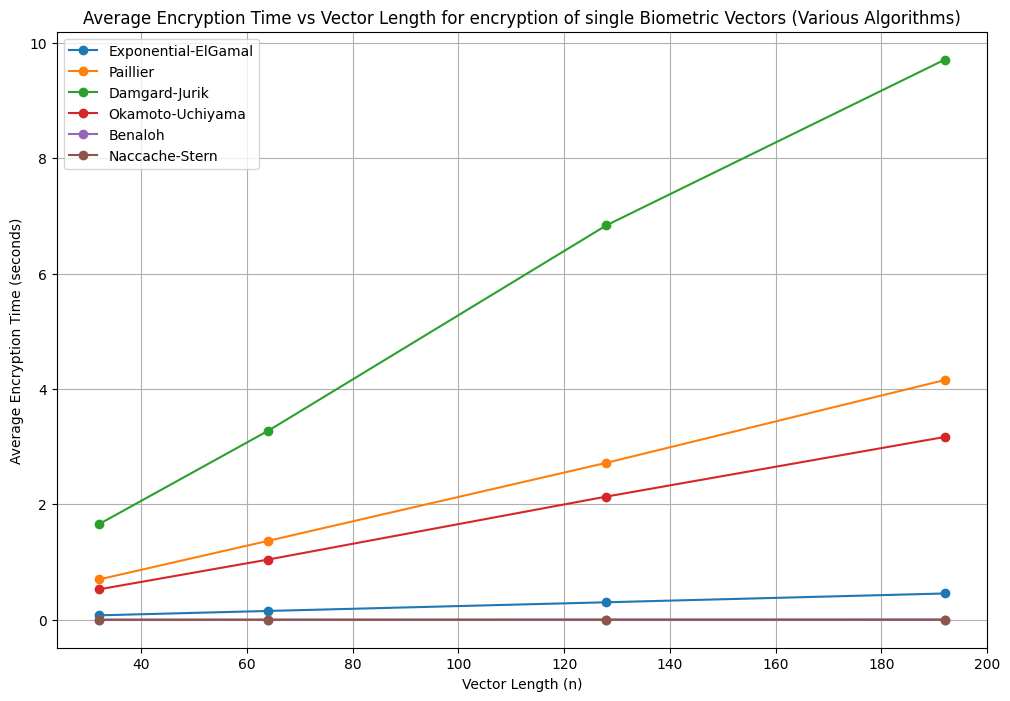

In [12]:
# Dictionary to hold encryption times for each algorithm and vector length
encryption_times = {alg: [] for alg in algorithms}

# Run the test for each algorithm and vector length (encryption only)
for alg in algorithms:
    # Initialize the encryption scheme for the algorithm
    cs = LightPHE(algorithm_name=alg)
    print(f"Measuring encryption times for algorithm: {alg}")

    for n in vector_lengths:
        times = []

        for _ in range(num_pairs):
            # Randomly select a label
            label_X = random.choice(labels)

            # Get the vector and truncate to length n
            X_raw = ALL_DICT_DATA[label_X][:n]

            # Process the vector to convert to integer representation
            X = process_vector(X_raw)

            # Start timing
            start_time = time.time()

            # Encrypt the vector
            enc_X = [cs.encrypt(int(x)) for x in X]

            # End timing
            end_time = time.time()

            # Calculate elapsed time and store it
            elapsed_time = end_time - start_time
            times.append(elapsed_time)

        # Compute average encryption time for this vector length
        avg_time = sum(times) / num_pairs
        encryption_times[alg].append(avg_time)
        print(f"Algorithm: {alg}, Vector length: {n}, Average Encryption Time: {avg_time:.6f} seconds")

# Plotting the encryption times
plt.figure(figsize=(12, 8))

# For each algorithm, plot the average encryption times across vector lengths
for alg in algorithms:
    plt.plot(vector_lengths, encryption_times[alg], marker='o', label=alg)

plt.xlabel("Vector Length (n)")
plt.ylabel("Average Encryption Time (seconds)")
plt.title("Average Encryption Time vs Vector Length for encryption of single Biometric Vectors (Various Algorithms)")
plt.legend()
plt.grid(True)
plt.show()


## Visualizing the conversion factor


In [13]:
# Load the data from "emb.txt"
with open('new_emb.txt', 'r') as f:
    data = f.read()
ALL_DICT_DATA = json.loads(data)

# Function to process the vector (apply the conversion factor)
def process_vector(vec):
    CONVERSION_FACTOR = 1 << 8  # 256
    return [int(v * CONVERSION_FACTOR) for v in vec]

# Select a random vector from the dataset
label = list(ALL_DICT_DATA.keys())[0]  # Example: taking the first label
original_vector = ALL_DICT_DATA[label]  # Get the corresponding vector

# Process the vector using the conversion factor
processed_vector = process_vector(original_vector)

# Print the original and processed vectors
print("Original vector:", original_vector[:10])  # Print the first 10 elements for brevity
print("Processed vector:", processed_vector[:10])  # Print the first 10 elements for brevity


Original vector: [-0.3641, -0.1997, 0.1144, -0.7122, -0.0974, 0.7743, -0.0868, -0.9901, 0.0311, 0.3887]
Processed vector: [-93, -51, 29, -182, -24, 198, -22, -253, 7, 99]
